In [1]:
from sklearn.decomposition import KernelPCA
from sklearn.metrics import normalized_mutual_info_score as nMI
from sklearn.metrics import mutual_info_score as MI
from sklearn.metrics import adjusted_mutual_info_score as aMI
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
import numpy as np
import numpy as np
import random
import math

In [2]:
from sklearn.datasets import load_boston

In [3]:
def InxOfSortedFea(feaInfo):
    """return sorted index of a list"""
    sortInfo=sorted(feaInfo,reverse=True)
    ##for test
    ##print sortInfo
    return [feaInfo.index(i) for i in sortInfo]

In [4]:
def corDis(x,y):
    """
    calculate the correlation distance, given x and y calculate how similar the x and y is.
    return a value, 0 means x and y are independent, higher mean x are determinstic of y.
    """
    assert len(x)==len(y)
    n=len(x)
    a=np.zeros((n,n))
    b=np.zeros((n,n))
    ##calculate pair wise distance
    for i in xrange(n):
        for j in xrange(n):
            a[i,j]=np.linalg.norm(x[i]-x[j])
            b[i,j]=np.linalg.norm(y[i]-y[j])
    aRowMean=np.mean(a,axis=1)
    aColMean=np.mean(a,axis=0)
    bRowMean=np.mean(b,axis=1)
    bColMean=np.mean(b,axis=0)
    aMean=np.mean(a)
    bMean=np.mean(b)
    A=np.zeros((n,n))
    B=np.zeros((n,n))
    ##normalization
    for i in xrange(n):
        for j in xrange(n):
            A[i,j]=a[i,j]-aRowMean[i]-aColMean[j]+aMean
            B[i,j]=b[i,j]-bRowMean[i]-bColMean[j]+bMean
    cordis=0.
    for i in xrange(n):
        for j in xrange(n):
            cordis += A[i,j]*B[i,j]
    return cordis*(1./n**2)

In [5]:
def MSE(target,predictions):
    """calculate MSE
    target and predictions are two list
    """
    SSE=np.power(target-predictions,2)
    return np.mean(SSE)

In [6]:
def KthFold(x,ith,kfold=5):
    """given a list, divide into k=5 fold, 
    one piece for test and other for training
    ith indicate ith pieces for test, left are training
    """
    n=len(x)
    test=x[(0+ith)*n/kfold:(1+ith)*n/kfold]
    train=np.delete(x,test)
    return test,train

In [7]:
def crossValidation(data,y,index):
    """
    according to the true y, predict
    greedy algorithm: first using index
    return
    """
    col=[]
    kfold=range(data.shape[0])
    random.shuffle(kfold)
    ##five fold observation
    k=5
    for i in range(len(index)):
        indexChoiceError=[]
        for j in xrange(k):
            lr=LinearRegression(fit_intercept=True)
            ##kfold cross validation
            test,train=KthFold(x=kfold,ith=j)
            ##can not slicing data on row and col at same time,so slicing two step(need to be imporved.)
            stepData=data[:,index[:i+1]]
            #
            lr.fit(stepData[train],[y[n] for n in train])
            indexChoiceError.append(MSE([y[n] for n in test],lr.predict(stepData[test])))
        col.append(np.mean(indexChoiceError))
    return col

In [1]:
def layer(x,y):
    kpca=KernelPCA(kernel='rbf',gamma=10.,n_components=x.shape[1])
    xT=kpca.fit_transform(x)
    rank=[]
    features=xT.shape[1]
    for i in range(features):
        rank.append(corDis(xT[:,i],y))
    #select features
    feaSelected=InxOfSortedFea(rank)
    #using crossvalidation
    crossError=crossValidation(xT,y,feaSelected)
    ##
    print crossError.index(min(crossError))+1
    return xT[:,:crossError.index(min(crossError))+1],crossError

In [79]:
#%matplotlib inline
from matplotlib import pyplot as plt
def plotFunction(x,y,text):
    n=x.shape[1]
    cols=2
    rows=int(math.ceil(n/2.))
    fig,ax=plt.subplots(ncols=cols,nrows=rows)
    if rows==1:
        for j in range(cols):
            if j<n:
                ax[j].scatter(x[:,j],y,c='b')
    else:
        for i in range(rows):
            for j in range(cols):
                if i*cols+j<n:
                    ax[i,j].scatter(x[:,i*cols+j],y,c='b')
                    #ax[i].title('x%d'%i,fontsize='small')
    plt.title(text)
    plt.show()

#print int(math.ceil(result1.shape[1]/2.))
#plotFunction(result1,y,"first layer")

In [246]:
def plotErr(err):
    x=range(len(err))
    #y=[e/min(err) for e in err]
    plt.bar(x,err)
    plt.title('scaling Error Bar_Chart')
    plt.show()
##test
#a=[78.522810935723712, 78.262141248363264, 72.959869746090931, 72.274221676405404, 69.483572183407134, 67.924577597397246]
#plotErr(a)

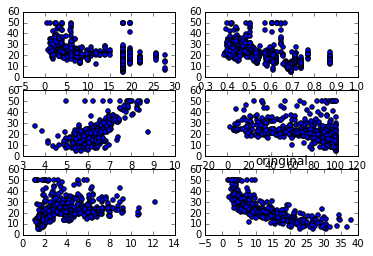

In [180]:
boston=load_boston()
c=[2,4,5,6,7,12]
y=boston.target
x=boston.data[:,c]
#print x[:5],y[:5]
plotFunction(x,y,'oringinal')

6


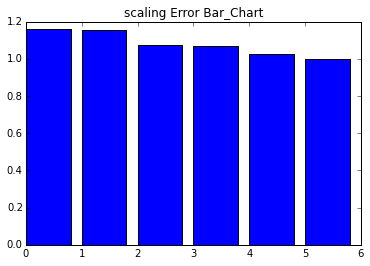

In [182]:
result1,e1=layer(x,y)
plotErr(e1)

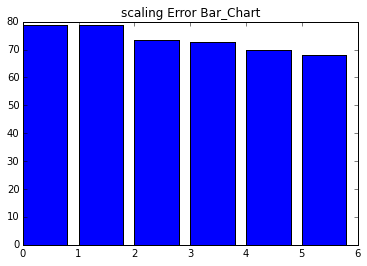

In [247]:
plotErr(e1)

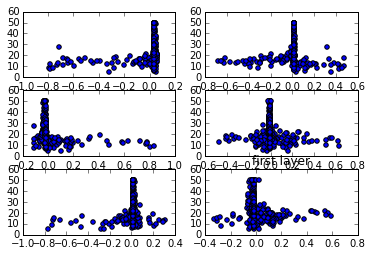

In [183]:
%matplotlib inline
from matplotlib import pyplot as plt

plotFunction(result1,y,"first layer")

6


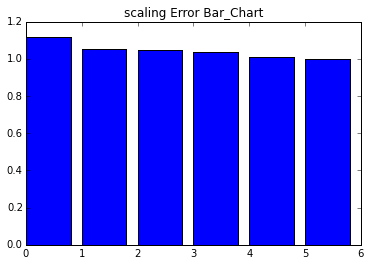

In [184]:
result2,e2=layer(result1,y)
plotErr(e2)

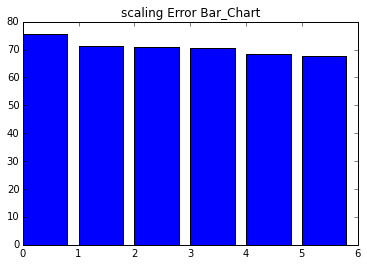

In [248]:
plotErr(e2)

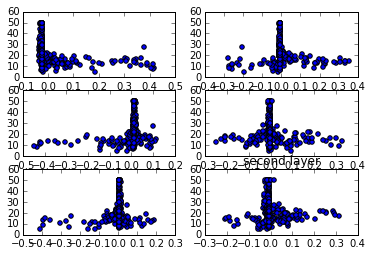

In [185]:
plotFunction(result2,y,"second layer")

6


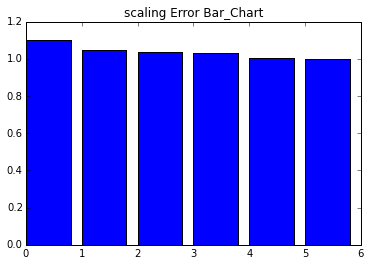

In [186]:
result3,e3=layer(result2,y)
plotErr(e3)

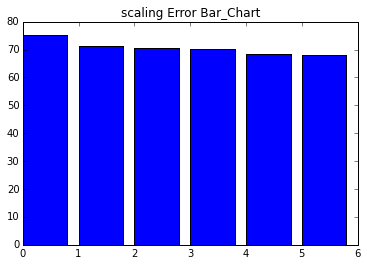

In [249]:
plotErr(e3)

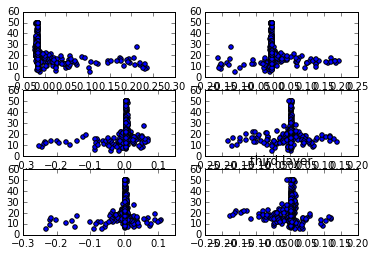

In [187]:
plotFunction(result3,y,"third layer")

6


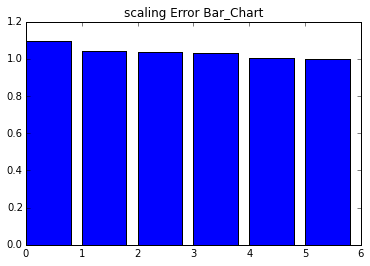

In [188]:
result4,e4=layer(result3,y)
plotErr(e4)

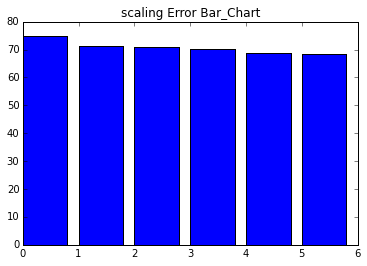

In [250]:
plotErr(e4)

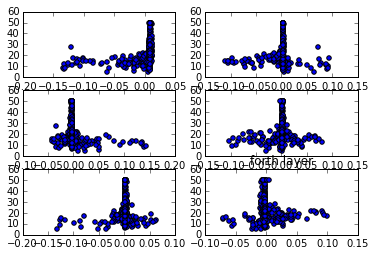

In [189]:
plotFunction(result4,y,"forth layer")

6


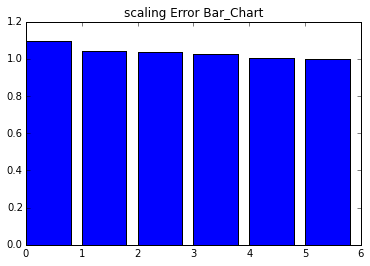

In [190]:
result5,e5=layer(result4,y)
plotErr(e5)

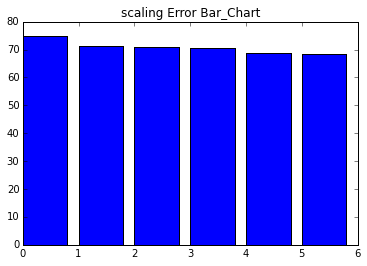

In [251]:
plotErr(e5)

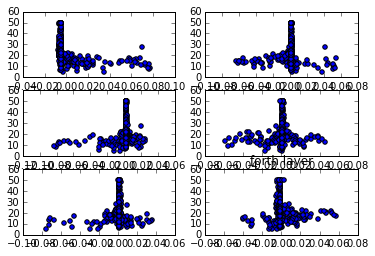

In [191]:
plotFunction(result5,y,"fifth layer")

6


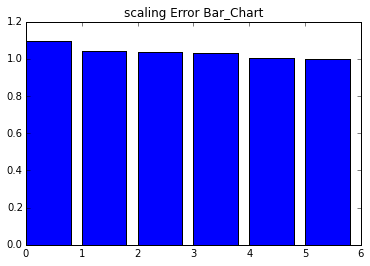

In [192]:
result6,e6=layer(result5,y)
plotErr(e6)

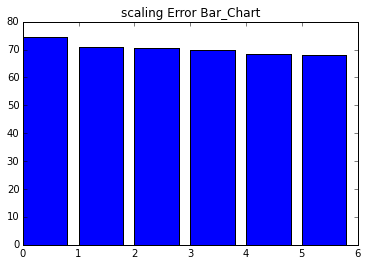

In [252]:
plotErr(e6)

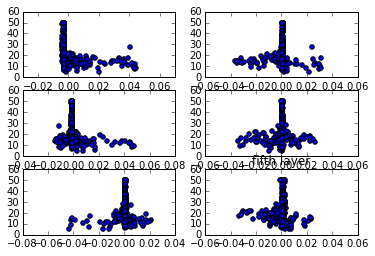

In [193]:
plotFunction(result6,y,"fifth layer")

In [194]:
from sklearn import datasets as ds
#?ds.make_regression

n_samples : int, optional (default=100)
    The number of samples.

n_features : int, optional (default=100)
    The number of features.

n_informative :

(100L, 20L)


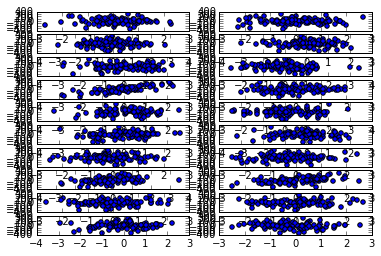

In [228]:
xs,ys=ds.make_regression(n_samples=100,n_features=20,n_informative=5)
print xs.shape
plotFunction(xs,ys,'')

20


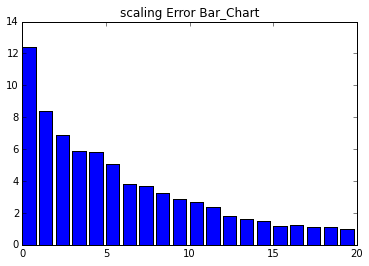

In [229]:
result_s,es=layer(xs,ys)
plotErr(es)

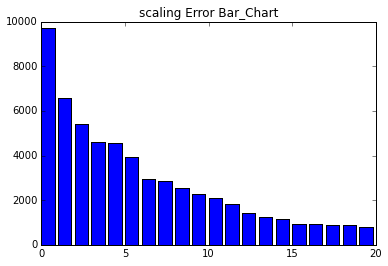

In [253]:
plotErr(es)

19


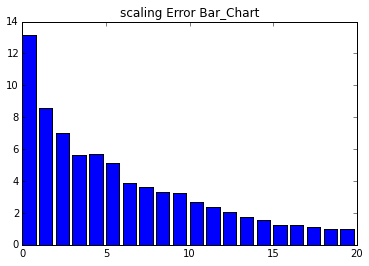

In [230]:
result_s1,es1=layer(result_s,ys)
plotErr(es1)

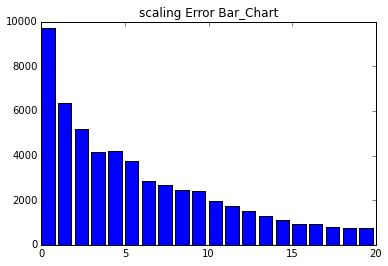

In [254]:
plotErr(es1)

18


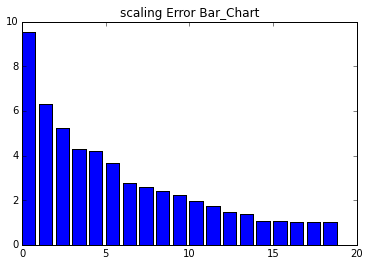

In [231]:
result_s2,es2=layer(result_s1,ys)
plotErr(es2)

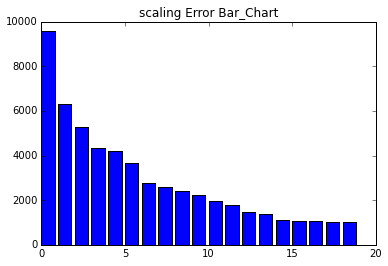

In [255]:
plotErr(es2)

17


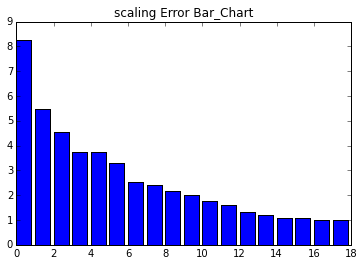

In [232]:
result_s3,es3=layer(result_s2,ys)
plotErr(es3)

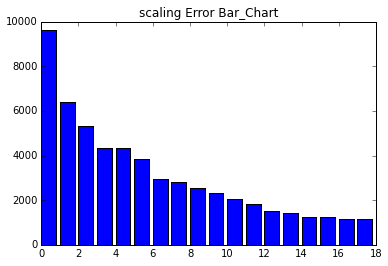

In [256]:
plotErr(es3)

17


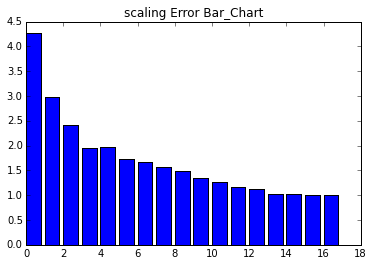

In [233]:
result_s4,es4=layer(result_s3,ys)
plotErr(es4)

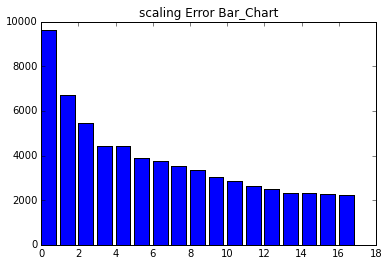

In [257]:
plotErr(es4)

17


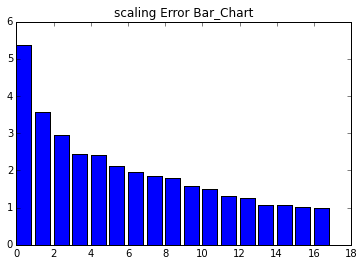

In [234]:
result_s5,es5=layer(result_s4,ys)
plotErr(es5)

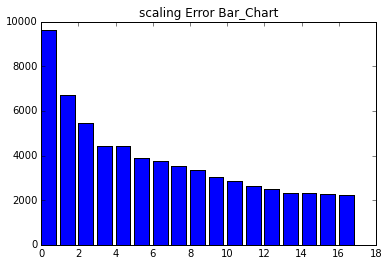

In [258]:
plotErr(es4)

15


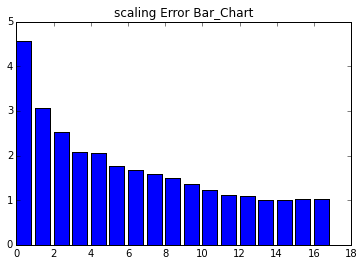

In [235]:
result_s6,es6=layer(result_s5,ys)
plotErr(es6)

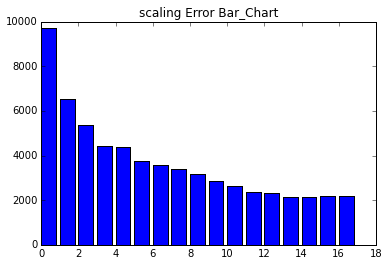

In [259]:
plotErr(es6)

13


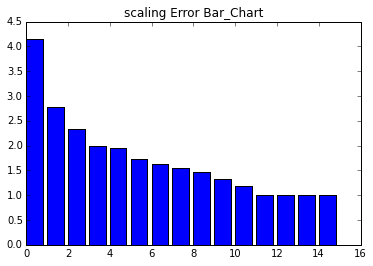

In [237]:
result_s7,es7=layer(result_s6,ys)
plotErr(es7)

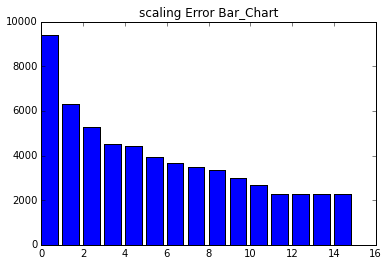

In [260]:
plotErr(es7)

13


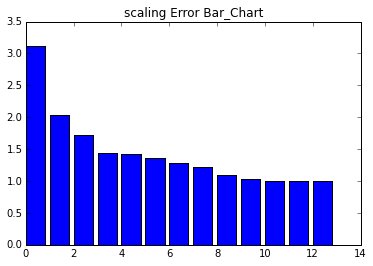

In [238]:
result_s8,es8=layer(result_s7,ys)
plotErr(es8)

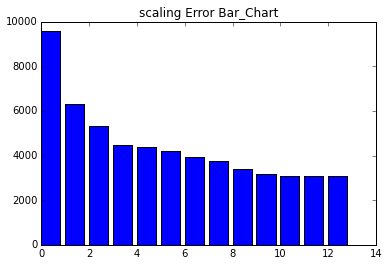

In [261]:
plotErr(es8)

11


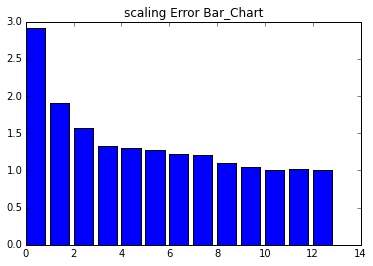

In [239]:
result_s9,es9=layer(result_s8,ys)
plotErr(es9)

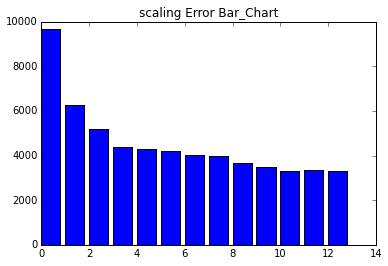

In [262]:
plotErr(es9)

10


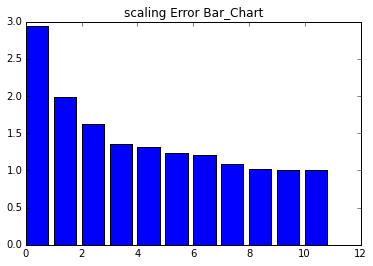

In [240]:
result_s10,es10=layer(result_s9,ys)
plotErr(es10)

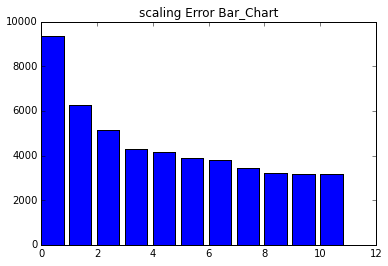

In [263]:
plotErr(es10)

9


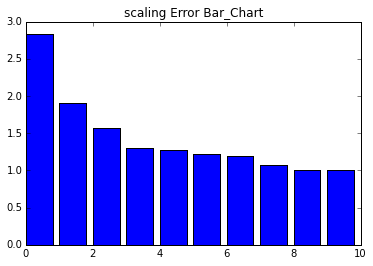

In [241]:
result_s11,es11=layer(result_s10,ys)
plotErr(es11)

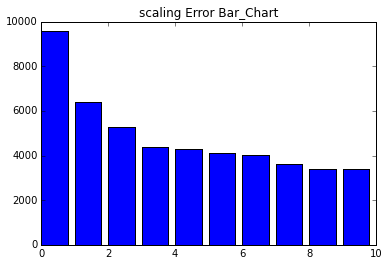

In [264]:
plotErr(es11)

8


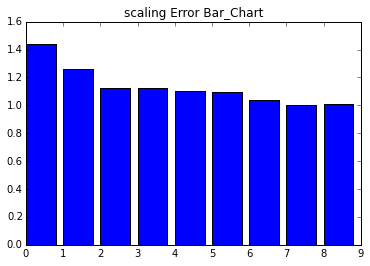

In [242]:
result_s12,es12=layer(result_s11,ys)
plotErr(es12)

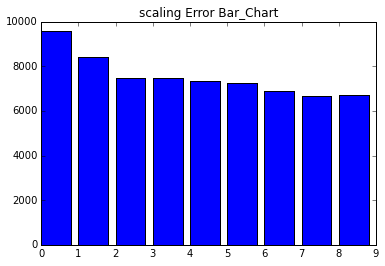

In [265]:
plotErr(es12)

8


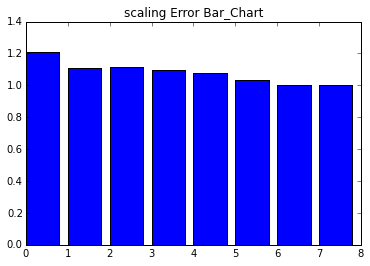

In [243]:
result_s13,es13=layer(result_s12,ys)
plotErr(es13)

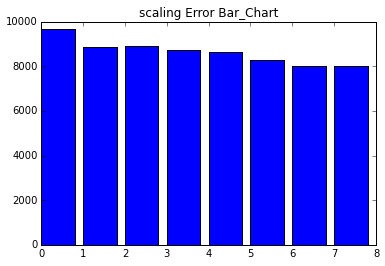

In [266]:
plotErr(es13)

7


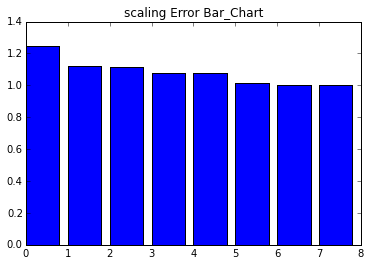

In [244]:
result_s14,es14=layer(result_s13,ys)
plotErr(es14)

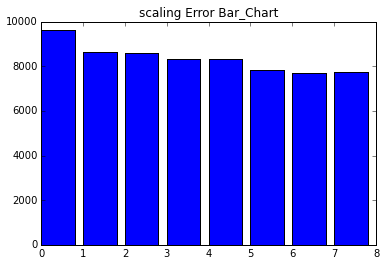

In [267]:
plotErr(es14)

In [212]:
spx,spy=ds.make_regression(n_samples=50,n_features=200,n_informative=5)
print spx.shape
#plotFunction(xs,ys,'')

(50L, 200L)


46


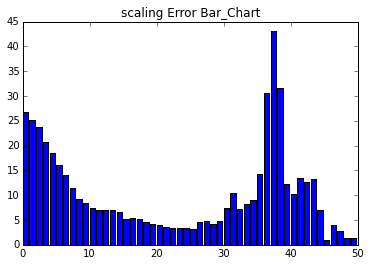

In [213]:
ls,eps=layer(spx,spy)
plotErr(eps)

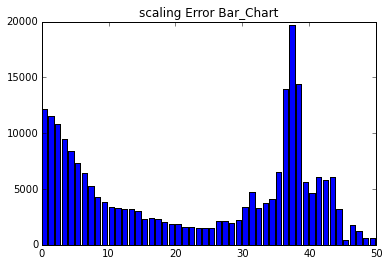

In [268]:
plotErr(eps)

46


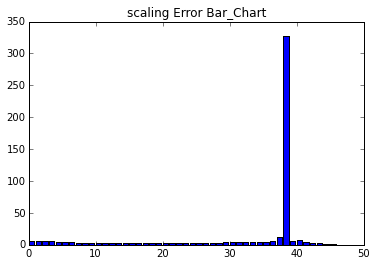

In [214]:
ls1,eps1=layer(ls,spy)
plotErr(eps1)

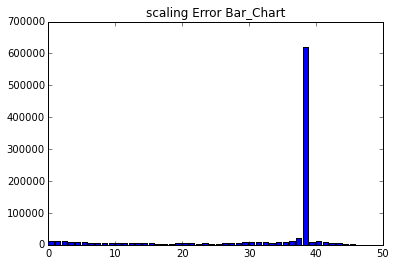

In [269]:
plotErr(eps1)

27


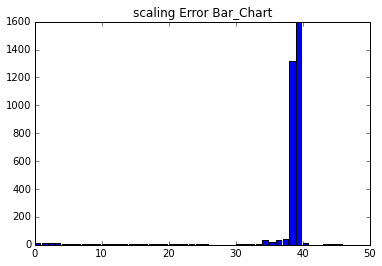

In [215]:
ls2,eps2=layer(ls1,spy)
plotErr(eps2)

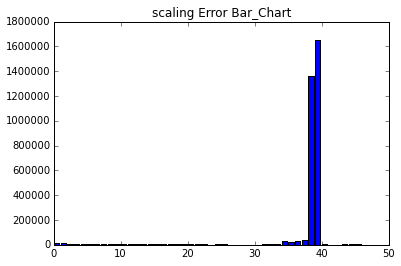

In [270]:
plotErr(eps2)

15


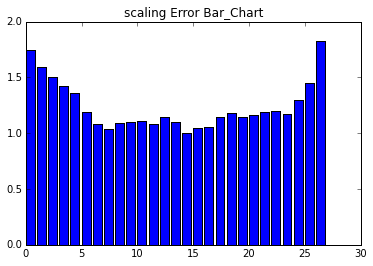

In [216]:
ls3,eps3=layer(ls2,spy)
plotErr(eps3)

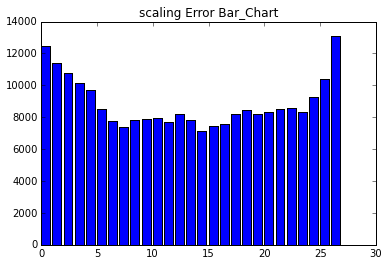

In [271]:
plotErr(eps3)

9


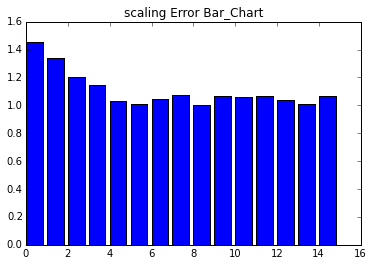

In [217]:
ls4,eps4=layer(ls3,spy)
plotErr(eps4)

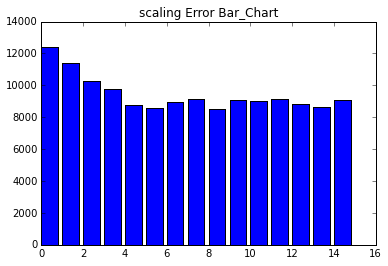

In [272]:
plotErr(eps4)

7


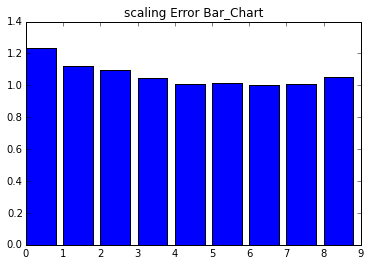

In [219]:
ls5,eps5=layer(ls4,spy)
plotErr(eps5)

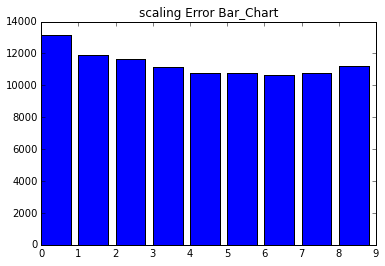

In [273]:
plotErr(eps5)

6


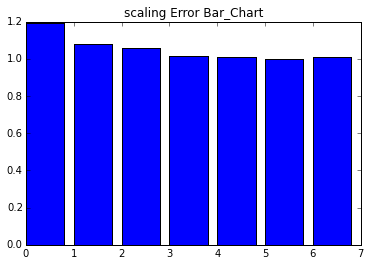

In [220]:
ls6,eps6=layer(ls5,spy)
plotErr(eps6)

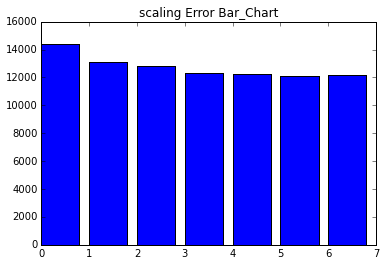

In [274]:
plotErr(eps6)

6


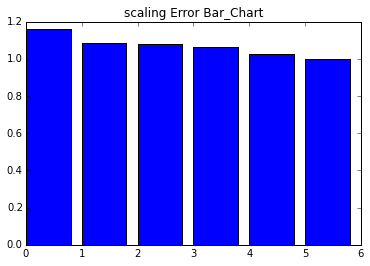

In [221]:
ls7,eps7=layer(ls6,spy)
plotErr(eps7)

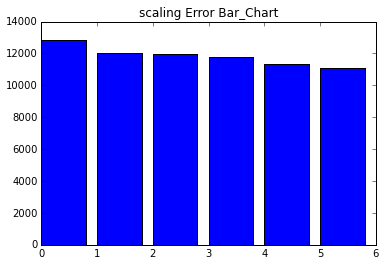

In [275]:
plotErr(eps7)

6


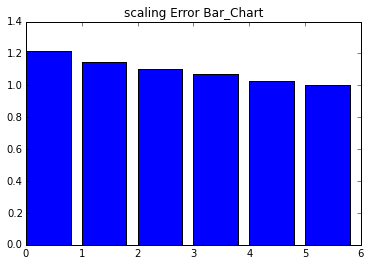

In [222]:
ls8,eps8=layer(ls7,spy)
plotErr(eps8)

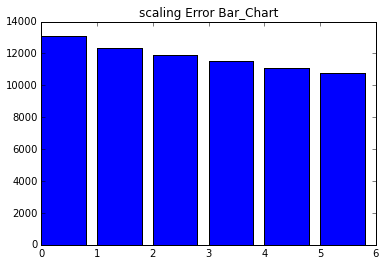

In [276]:
plotErr(eps8)

5


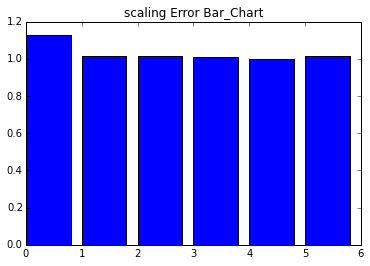

In [223]:
ls9,eps9=layer(ls8,spy)
plotErr(eps9)

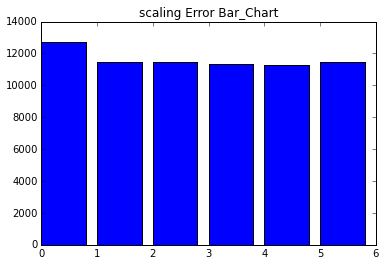

In [277]:
plotErr(eps9)

5


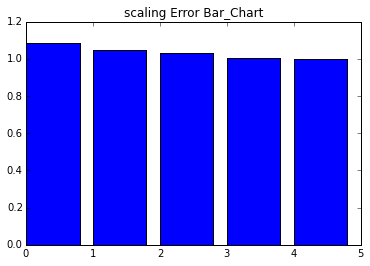

In [224]:
ls10,eps10=layer(ls9,spy)
plotErr(eps10)

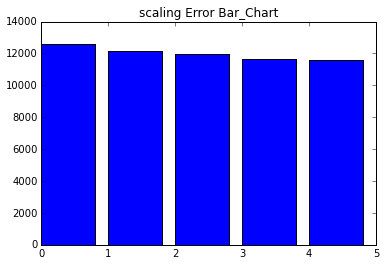

In [278]:
plotErr(eps10)

4


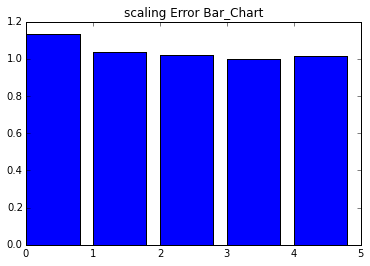

In [225]:
ls11,eps11=layer(ls10,spy)
plotErr(eps11)

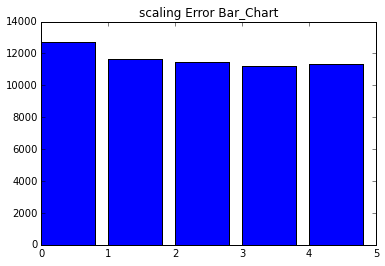

In [279]:
plotErr(eps11)

4


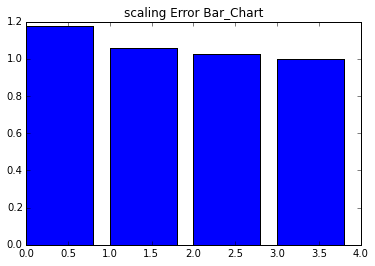

In [226]:
ls12,eps12=layer(ls11,spy)
plotErr(eps12)

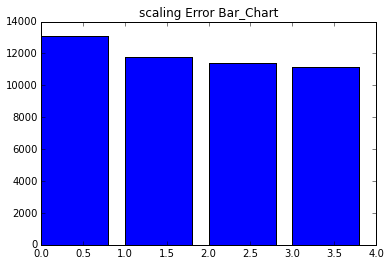

In [280]:
plotErr(eps12)

4


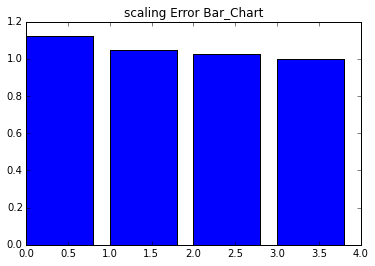

In [227]:
ls13,eps13=layer(ls12,spy)
plotErr(eps13)

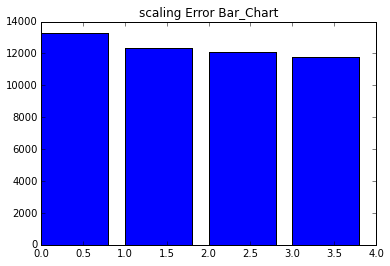

In [281]:
plotErr(eps13)

In [ ]:
def crossValidation(data,y,index):
    """
    according to the true y, predict
    greedy algorithm: first using index
    return
    """
    col=[]
    kfold=range(data.shape[0])
    random.shuffle(kfold)
    ##five fold observation
    k=5
    for i in range(len(index)):
        indexChoiceError=[]
        for j in xrange(k):
            lr=LinearRegression(fit_intercept=True)
            ##kfold cross validation
            test,train=KthFold(x=kfold,ith=j)
            ##can not slicing data on row and col at same time,so slicing two step(need to be imporved.)
            stepData=data[:,index[:i+1]]
            #
            lr.fit(stepData[train],[y[n] for n in train])
            indexChoiceError.append(MSE([y[n] for n in test],lr.predict(stepData[test])))
        col.append(np.mean(indexChoiceError))
    return col